<a href="https://colab.research.google.com/github/paulohenrique1303/Classification-Model/blob/main/Validation_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#O objetivo é prever se um determinado carro irar ser vendido. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from datetime import datetime

# Fase de analises e ajustes 

Abrindo o arquivo

In [2]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)
dados

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,no
9996,9996,13246,2002,107424.63,yes
9997,9997,13018,2014,93856.99,no
9998,9998,10464,2011,51250.57,yes


In [3]:
troca = {
    'Unnamed: 0' : 'id',
    'mileage_per_year' : 'milhas_por_ano',
    'model_year': 'ano_do_modelo',
    'price' : 'preco',
    'sold' : 'vendido'
}
dados = dados.rename(columns= troca)
dados.head()

,id,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [4]:
a_trocar = {
    'no' : '0',
    'yes' : '1'
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,id,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [5]:
ano_atual = datetime.today().year

dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,id,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


In [6]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,id,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,22,35085.22134
1,1,7843,1998,40557.96,1,24,12622.05362
2,2,7109,2006,89627.50,0,16,11440.79806
3,3,26823,2015,95276.14,0,7,43167.32682
4,4,7935,2014,117384.68,1,8,12770.11290


In [7]:
dados = dados.drop(columns= ['id', 'milhas_por_ano', 'ano_do_modelo'], axis= 1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


Definir features (x) e label(y)

In [8]:
x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

# Modelos com variações de validaçoes cruzadas.

In [15]:
from sklearn.model_selection import train_test_split #Para separar os dados de treino e teste
from sklearn.tree import DecisionTreeClassifier #Classificador por arvore de decisão
from sklearn.dummy import DummyClassifier #Classificador baseline

np.random.seed(0)
#Definimos a seed do numpy,pois os não precisaremos passar a seed para o parâmetro random_state.

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size= 0.25, stratify= y)
#Separamos os dados de treino e teste proporcionalmente pelo rotulo. 

modelo = DecisionTreeClassifier(max_depth = 2)
modelo.fit(treino_x, treino_y)
acuracia = modelo.score(teste_x, teste_y) * 100
print(f'A acuracia do modelo com clasicador DecisionTreeClassifier, sem validação cruzada , sem kfold e sem suflle: {acuracia} %')
#Fazemos o modelo e testamos a acurácia.

dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
acuracia_dummy = dummy.score(teste_x, teste_y)
print(f'A ACURÁCIA DO DUMMY (BASELINE) FOI DE {acuracia_dummy * 100 :.2f}%')
#Fazemos o modelo dummy (Baseline).

A acuracia do modelo com clasicador DecisionTreeClassifier, sem validação cruzada , sem kfold e sem suflle: 72.48 %
A ACURÁCIA DO DUMMY (BASELINE) FOI DE 58.00%


Conlussão desse modelo:
Esse modelo apresenta uma falha de treino e teste, pois é feito sem 
estratificação e sem embaralhamento além de depender muito do fator sorte. 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.dummy import DummyClassifier

np.random.seed(0)
#Definimos a seed do numpy,pois os não precisaremos passar a seed para o parâmetro random_state.

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size= 0.25, stratify= y) 
#Separamos os dados de treino e teste proporcionalmente pelo rotulo. 

modelo = DecisionTreeClassifier(max_depth= 2)
modelo.fit(treino_x, treino_y)
#Fazemos o modelo e testamos a acurácia.

cv = KFold(n_splits= 10)
# Quebramos os dados do modelo em dez partes para para minimizar desbalceamentos da aleatóriedade.   

resultados =cross_val_score(modelo, x, y, cv= cv)
desvio_padrao = resultados.std()
print(f'Acurácia media {resultados.mean() * 100:.2f}%')
print(f'A acurácia com cross validate score e kfold foi entre [{(resultados.mean() - (2 * desvio_padrao)) * 100 :.2f}% e {(resultados.mean() + (2 * desvio_padrao)) * 100 :.2f}%]')
#Fazemos o modelo e testamos a acurácia.

dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
acuracia_dummy = dummy.score(teste_x, teste_y)
print(f'A ACURÁCIA DO DUMMY FOI DE {acuracia_dummy * 100 :.2f}%')
#Fazemos o modelo dummy (Baseline).

Acurácia media 75.78%
A acurácia com cross validate score e kfold foi entre [74.37% e 77.19%]
A ACURÁCIA DO DUMMY FOI DE 58.00%


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.dummy import DummyClassifier

np.random.seed(0)
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size= 0.25, stratify= y) 

modelo = DecisionTreeClassifier(max_depth= 2)
modelo.fit(treino_x, treino_y)

cv = StratifiedKFold(n_splits= 10, shuffle= True)

resultado =cross_val_score(modelo, x, y, cv= cv)
desvio_padrao = resultado.std()
print(f'Acurácia media {resultado.mean() * 100:.2f}%')
print(f'A acurácia com o classificador DesisionTreeClassifier, cross validate e shuffle foi entre [{(resultado.mean() - (2 * desvio_padrao)) * 100 :.2f}% e {(resultado.mean() + (2 * desvio_padrao)) * 100 :.2f}%]')

dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
acuracia_dummy = dummy.score(teste_x, teste_y)

print(f'A ACURÁCIA DO DUMMY FOI DE {acuracia_dummy * 100 :.2f}%')

Acurácia media 75.76%
A acurácia com o classificador DesisionTreeClassifier, cross validate e shuffle foi entre [72.32% e 79.20%]
A ACURÁCIA DO DUMMY FOI DE 58.00%


Esse modelo ele tem um desempenho irreal quando aplicado, pois todos os grupos estão no treino e teste, assim o algoritimo não performace bem para outros grupos. 

In [12]:
dados['modelo_aleatorio'] = dados.idade_do_modelo + np.random.randint(-2,3, size= 10000)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo_aleatorio
0,30941.02,1,22,35085.22134,24
1,40557.96,1,24,12622.05362,23
2,89627.50,0,16,11440.79806,17
3,95276.14,0,7,43167.32682,9
4,117384.68,1,8,12770.11290,6


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.dummy import DummyClassifier

np.random.seed(0)
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size= 0.25, stratify= y) 

modelo = DecisionTreeClassifier(max_depth= 2)
modelo.fit(treino_x, treino_y)

cv = GroupKFold(n_splits= 10)

resultado =cross_val_score(modelo,x, y, cv= cv, groups= dados.modelo_aleatorio)
desvio_padrao = resultado.std()
print(f'Acurácia media {resultado.mean() * 100:.2f}%')
print(f'A acurácia com o classificador DesisionTreeClassifier, cross validate e GroupKFold [{(resultado.mean() - (2 * desvio_padrao)) * 100 :.2f}% e {(resultado.mean() + (2 * desvio_padrao)) * 100 :.2f}%]')

dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
acuracia_dummy = dummy.score(teste_x, teste_y)

print(f'A ACURÁCIA DO DUMMY FOI DE {acuracia_dummy * 100 :.2f}%')

Acurácia media 75.80%
A acurácia com o classificador DesisionTreeClassifier, cross validate e GroupKFold [70.55% e 81.04%]
A ACURÁCIA DO DUMMY FOI DE 58.00%


Quando utilizado o GroupKFold é feito uma separação por grupos, assim o algotirito tem uma peformace melhorada para os grupos que o modelo não conhece.

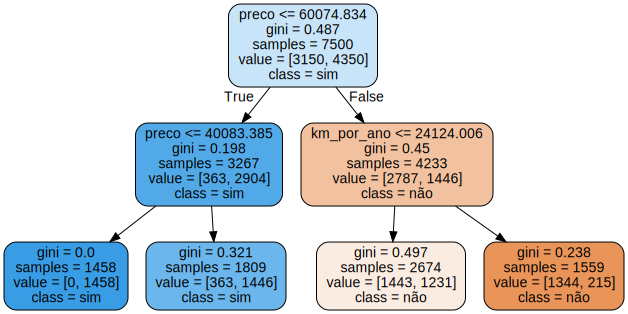

In [14]:
grafico_dot = export_graphviz(modelo, feature_names= x.columns, filled= True,
                              rounded= True, class_names= ['não', 'sim'])
grafico = graphviz.Source(grafico_dot)
grafico